In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import markers
import seaborn as sns

sns.set_theme(style="whitegrid")

0A_03_Activation_CV_U_4.4_L_3.4.txt
0A_03_Final_CV_U_4.4_L_3.4.txt


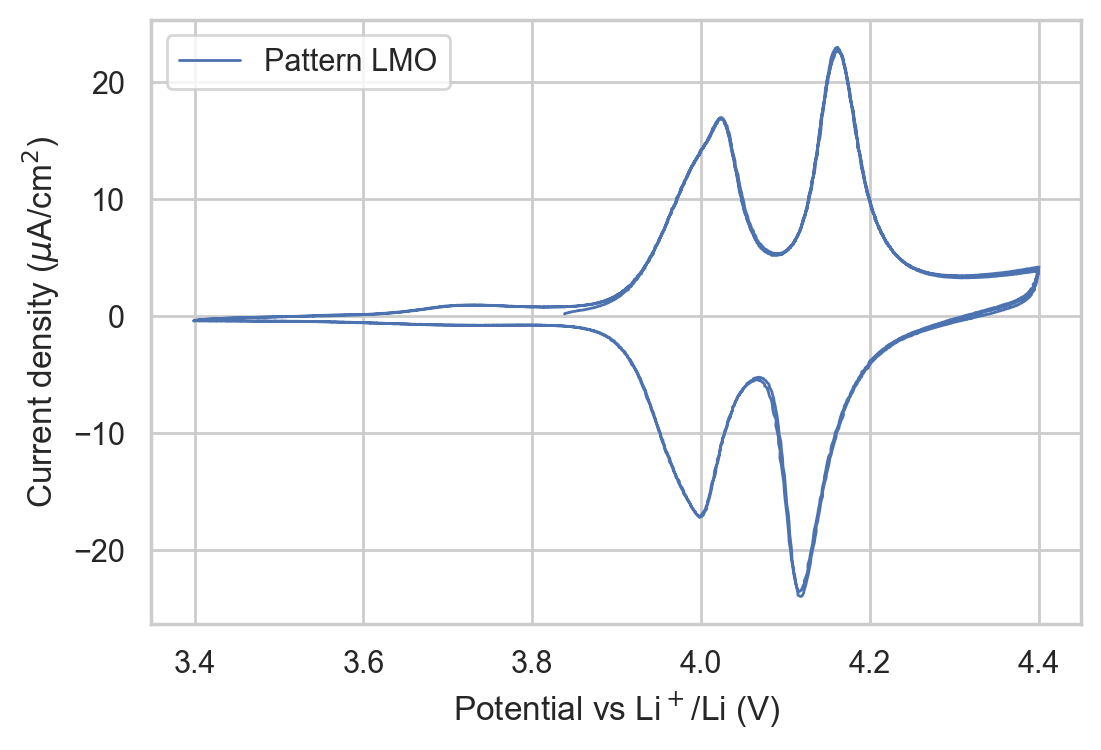

In [149]:
# Plot CV curves as prepared and treated with chemicals used in litho

# Variables
# samples = ['0A_00_2', '0A_02']
samples = ['0A_03']
l = ['As prepared', 'After litho process']
names = ['Potential vs Li$^+$/Li (V)', 'Current density ($\mu$A/cm$^2$)']
names_cd = ['Capacity (mAh/cm$^3$)', 'Potential vs Li$^+$/Li (V)']
n = 0

# Plot
fig, ax = plt.subplots(facecolor = 'white' , dpi = 200)
#ax.set_title()
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
# ax.set_xlim(3.4, 4.4)

data_path = data_path = os.path.join(Path.cwd().parent, 'Experiments', 'Data', 'Electrochemical', 'LSB_01')
dir = os.listdir(data_path)
for i in dir:
    if i in samples:
        path = os.path.join(data_path, i, 'CV')
        files_list = os.listdir(path)
        for j in files_list:
            print(j)
            if 'Activation' in j:
                file_path = os.path.join(path, j)
                data = pd.read_csv(file_path, skiprows = 1, sep = '\s+',  names = names, usecols = [0, 4])
                x, y = data[names[0]], data[names[1]]
                ax.plot(x,y * 1e6, label = 'Pattern LMO', lw = 1)
                n += 1


ax.legend()

save_path = os.path.join(data_path, 'Plots', 'Pattern LMO CV.png')
plt.savefig(save_path, facecolor = 'white',  bbox_inches='tight')


['0A_00', '0A_00_2', '0A_01', '0A_02', '0A_03', 'Plots']


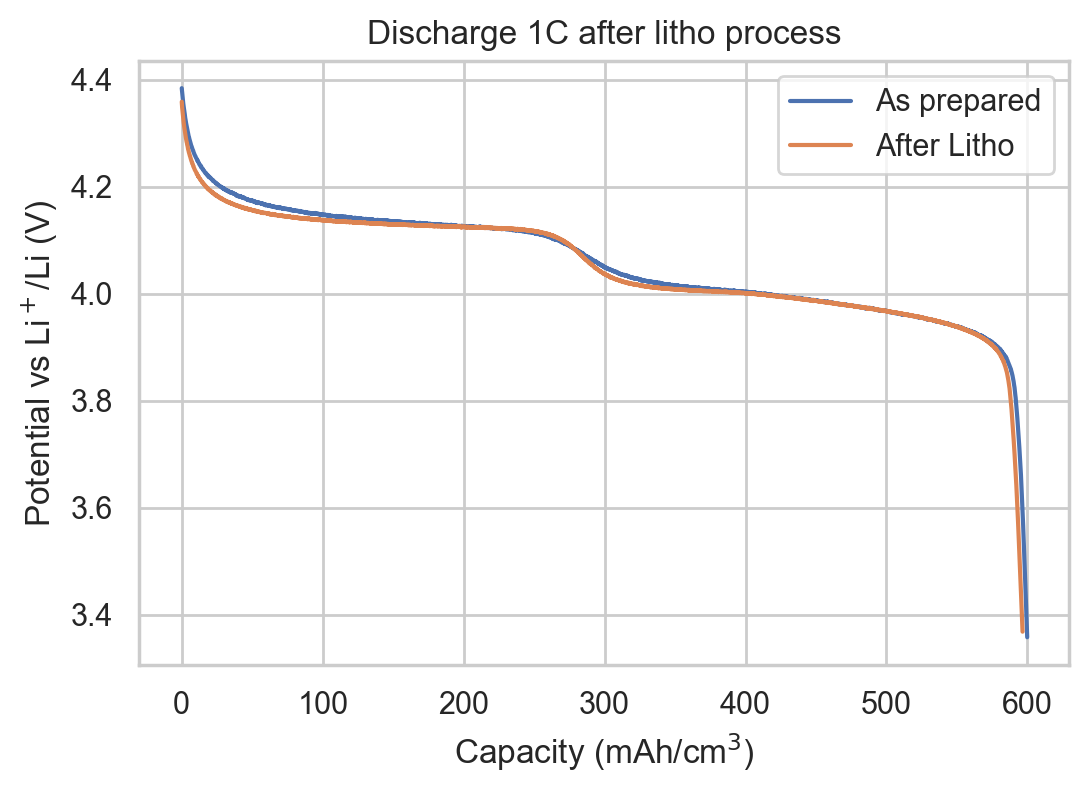

In [143]:
#Plot capacity


samples = ['0A_02']
a_02 = []
a_ref = []
print(dir)
for i in dir:
    if i in samples:
        path = os.path.join(data_path, i, 'Charge Discharge')
        files_path = os.listdir(path)
        fig, ax = plt.subplots(facecolor = 'white' , dpi = 200)
        ax.set_xlabel(names_cd[0])
        ax.set_ylabel(names_cd[1])
        ax.set_title('Discharge 1C after litho process')
        
        for j in files_path:
            file_path = os.path.join(path, j)
            
            if 'delith' not in j:
                data = pd.read_csv(file_path, skiprows = 1, sep = '\s+', usecols = [2, 5], names = names_cd)
                x, y = data[names_cd[1]], data[names_cd[0]]
                if len(x) > 100:
                    #if '1C.' in j:
                    if '20220405_0A_02_1c_lith_1C.txt' in j:
                        #print(j)
                        #ax.plot(x * 0.89, y)
                        a_02.append((x * 0.89, y))

names_cdd = ['Potential vs Li$^+$/Li (V)', 'Capacity (mAh/cm$^3$)']
ref_path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_01\0A_00_2\Charge Discharge\0A_00_2_1c_lith_1C.txt'
data_ref = pd.read_csv(ref_path, skiprows = 1, sep = '\s+', usecols = [5,2], names = names_cd)#), usecols = [2, 5], names = names_cd)
x, y = data_ref[names_cdd[0]], data_ref[names_cdd[1]]

ax.plot(x, y, label = 'As prepared') # ref
ax.plot(a_02[0][0], a_02[0][1], label = 'After Litho')
ax.legend()
save_path = os.path.join(data_path, 'Plots', 'Integrity LMO litho CD 1cycle.png')
plt.savefig(save_path, facecolor = 'white',  bbox_inches='tight')